# DACON - 유방암 전이 예측 이진 분류 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 

In [2]:
#Load data
pd.set_option('display.max_columns', None)

train_df = pd.read_csv("train.csv") # 1000, 28
test_df = pd.read_csv("test.csv") # 250, 28

print('train df shape:',train_df.shape)
print('test df shape:',test_df.shape)
train_df.head()

train df shape: (1000, 28)
test df shape: (250, 26)


,ID,img_path,mask_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,HG,HG_score_1,HG_score_2,HG_score_3,DCIS_or_LCIS_여부,DCIS_or_LCIS_type,T_category,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,./train_imgs/BC_01_0001.png,-,63,2015-10-23,1,2,1,19.0,2.0,1.0,2.0,2.0,1.0,2,NaN,1.0,1.0,8.0,1.0,6.0,12.0,0.0,1.0,NaN,NaN,NaN,0
1,BC_01_0002,./train_imgs/BC_01_0002.png,-,51,2015-10-28,1,1,1,22.0,3.0,3.0,3.0,3.0,3.0,0,NaN,2.0,0.0,NaN,0.0,NaN,70.0,0.0,0.0,NaN,NaN,NaN,1
2,BC_01_0003,./train_imgs/BC_01_0003.png,-,37,2015-10-29,1,2,1,NaN,2.0,NaN,NaN,NaN,NaN,1,2.0,0.0,1.0,7.0,1.0,4.0,7.0,0.0,1.0,NaN,NaN,0.0,0
3,BC_01_0004,./train_imgs/BC_01_0004.png,-,54,2016-03-08,1,2,1,0.0,3.0,3.0,3.0,3.0,2.0,1,2.0,0.0,0.0,NaN,0.0,NaN,1.0,1.0,3.0,NaN,NaN,NaN,0
4,BC_01_0005,./train_imgs/BC_01_0005.png,-,57,2015-10-30,1,2,1,8.0,2.0,2.0,3.0,2.0,1.0,2,NaN,1.0,1.0,8.0,0.0,NaN,8.0,1.0,2.0,1.0,5.44,NaN,0


In [3]:
# encoding to ENG

train_df.rename(columns = {'나이':'age',
                           '수술연월일':'yr_mn_dt',
                           '진단명':'diag_cat',
                           '암의 위치':'location',
                           '암의 개수':'sng_mul',
                           '암의 장경':'size_mm',
                           'DCIS_or_LCIS_여부':'DCIS_or_LCIS'},inplace=True)

In [4]:
import os
os.getcwd()

'/Users/krc/Documents/breast_dacon/open'

In [5]:
# mask 가 있는 사진 리스트 
have_mask = train_df[train_df['mask_path'] != '-' ]

mask_list = have_mask.mask_path.values.tolist()
have_mask

,ID,img_path,mask_path,age,yr_mn_dt,diag_cat,location,sng_mul,size_mm,NG,HG,HG_score_1,HG_score_2,HG_score_3,DCIS_or_LCIS,DCIS_or_LCIS_type,T_category,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
13,BC_01_0015,./train_imgs/BC_01_0015.png,./train_masks/BC_01_0015.png,43,2019-02-11,4,1,2,13.0,2.0,1.0,2.0,2.0,1.0,2,NaN,1.0,1.0,7.0,1.0,8.0,10.01,0.0,2.0,0.0,1.23,NaN,0
80,BC_01_0397,./train_imgs/BC_01_0397.png,./train_masks/BC_01_0397.png,60,2020-01-08,1,2,1,23.0,2.0,2.0,3.0,2.0,2.0,0,NaN,2.0,1.0,7.0,1.0,6.0,20.22,0.0,0.0,NaN,NaN,NaN,1
81,BC_01_0398,./train_imgs/BC_01_0398.png,./train_masks/BC_01_0398.png,58,2019-12-12,1,2,1,13.0,2.0,2.0,3.0,2.0,1.0,0,NaN,1.0,1.0,8.0,1.0,5.0,20.93,0.0,1.0,NaN,NaN,NaN,1
82,BC_01_0404,./train_imgs/BC_01_0404.png,./train_masks/BC_01_0404.png,72,2019-12-26,1,2,1,13.0,2.0,1.0,2.0,2.0,1.0,2,NaN,1.0,1.0,7.0,1.0,8.0,6.38,0.0,1.0,NaN,NaN,NaN,1
84,BC_01_0417,./train_imgs/BC_01_0417.png,./train_masks/BC_01_0417.png,51,2019-12-05,1,2,2,21.0,2.0,2.0,3.0,2.0,1.0,2,NaN,2.0,1.0,7.0,0.0,NaN,18.86,0.0,2.0,0.0,1.27,NaN,1
86,BC_01_0425,./train_imgs/BC_01_0425.png,./train_masks/BC_01_0425.png,46,2019-12-12,4,1,1,5.0,1.0,1.0,1.0,1.0,1.0,0,NaN,1.0,1.0,6.0,1.0,6.0,4.60,0.0,2.0,0.0,1.10,NaN,0
88,BC_01_0451,./train_imgs/BC_01_0451.png,./train_masks/BC_01_0451.png,33,2019-11-05,1,2,2,22.0,3.0,3.0,3.0,3.0,2.0,2,NaN,2.0,1.0,6.0,1.0,4.0,44.92,0.0,2.0,0.0,1.42,NaN,1
89,BC_01_0454,./train_imgs/BC_01_0454.png,./train_masks/BC_01_0454.png,62,2019-10-22,1,1,1,13.0,2.0,2.0,2.0,2.0,2.0,2,NaN,1.0,1.0,7.0,1.0,6.0,11.84,0.0,2.0,0.0,1.32,NaN,1
90,BC_01_0455,./train_imgs/BC_01_0455.png,./train_masks/BC_01_0455.png,46,2019-10-07,1,2,1,14.0,2.0,2.0,3.0,2.0,1.0,2,NaN,1.0,1.0,7.0,1.0,8.0,16.37,0.0,1.0,NaN,NaN,NaN,1
91,BC_01_0457,./train_imgs/BC_01_0457.png,./train_masks/BC_01_0457.png,44,2019-10-30,2,2,2,40.0,2.0,2.0,3.0,2.0,1.0,2,NaN,2.0,1.0,7.0,1.0,6.0,2.60,0.0,1.0,NaN,NaN,NaN,1


In [34]:
# 중복된 이미지 자르기? 
num_list = ['0007','0010','0062','0178','0214','0215','0217','0230','0246','0268','0284','0285','0298','0302']
image_ls = '|'.join(num_list)
train_df[train_df['img_path'].str.contains(image_ls)]

,ID,img_path,mask_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,HG,HG_score_1,HG_score_2,HG_score_3,DCIS_or_LCIS_여부,DCIS_or_LCIS_type,T_category,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
6,BC_01_0007,./train_imgs/BC_01_0007.png,-,57,2015-12-18,1,1,1,NaN,2.0,NaN,NaN,NaN,NaN,1,2.0,0.0,1.0,6.0,1.0,4.0,5.00,1.0,3.0,NaN,NaN,NaN,0
9,BC_01_0010,./train_imgs/BC_01_0010.png,-,46,2015-11-18,1,1,1,NaN,1.0,NaN,NaN,NaN,NaN,1,2.0,0.0,1.0,7.0,1.0,4.0,7.00,0.0,0.0,NaN,NaN,0.0,0
14,BC_01_0062,./train_imgs/BC_01_0062.png,-,51,2019-10-30,1,1,1,25.0,3.0,3.0,3.0,3.0,3.0,2,2.0,2.0,0.0,NaN,0.0,NaN,50.96,0.0,1.0,NaN,NaN,0.0,0
15,BC_01_0178,./train_imgs/BC_01_0178.png,-,36,2019-05-27,1,2,2,2.0,3.0,2.0,3.0,3.0,1.0,2,1.0,1.0,0.0,NaN,0.0,NaN,89.17,0.0,0.0,NaN,NaN,0.0,0
18,BC_01_0214,./train_imgs/BC_01_0214.png,-,58,2020-06-29,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,0.0,0.0,NaN,0.0,NaN,28.66,NaN,2.0,0.0,30.00,NaN,0
19,BC_01_0215,./train_imgs/BC_01_0215.png,-,36,2020-06-18,1,2,2,5.0,2.0,2.0,3.0,2.0,2.0,2,2.0,1.0,1.0,6.0,1.0,4.0,20.15,0.0,2.0,0.0,1.33,0.0,1
21,BC_01_0217,./train_imgs/BC_01_0217.png,-,54,2020-06-30,1,1,1,16.0,NaN,NaN,NaN,NaN,NaN,1,2.0,1.0,0.0,NaN,0.0,NaN,17.36,1.0,3.0,NaN,NaN,NaN,0
28,BC_01_0230,./train_imgs/BC_01_0230.png,-,48,2020-06-15,1,1,1,10.0,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,4.0,1.0,4.0,14.91,0.0,2.0,NaN,NaN,NaN,0
34,BC_01_0246,./train_imgs/BC_01_0246.png,-,40,2020-05-14,1,2,2,19.0,2.0,2.0,3.0,2.0,2.0,2,2.0,1.0,1.0,7.0,1.0,8.0,15.18,0.0,2.0,0.0,1.52,0.0,1
45,BC_01_0268,./train_imgs/BC_01_0268.png,-,55,2020-04-10,1,2,1,3.0,2.0,2.0,3.0,2.0,1.0,2,1.0,1.0,0.0,NaN,0.0,NaN,10.88,0.0,1.0,NaN,NaN,NaN,0


In [6]:
train_df.info() #Non-null 및 categorical column 구분

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   object 
 1   img_path           1000 non-null   object 
 2   mask_path          1000 non-null   object 
 3   age                1000 non-null   int64  
 4   yr_mn_dt           1000 non-null   object 
 5   diag_cat           1000 non-null   int64  
 6   location           1000 non-null   int64  
 7   sng_mul            1000 non-null   int64  
 8   size_mm            931 non-null    float64
 9   NG                 949 non-null    float64
 10  HG                 914 non-null    float64
 11  HG_score_1         908 non-null    float64
 12  HG_score_2         908 non-null    float64
 13  HG_score_3         911 non-null    float64
 14  DCIS_or_LCIS       1000 non-null   int64  
 15  DCIS_or_LCIS_type  126 non-null    float64
 16  T_category         996 no

In [7]:
train_df[train_df['N_category'] == 1]

,ID,img_path,mask_path,age,yr_mn_dt,diag_cat,location,sng_mul,size_mm,NG,HG,HG_score_1,HG_score_2,HG_score_3,DCIS_or_LCIS,DCIS_or_LCIS_type,T_category,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
1,BC_01_0002,./train_imgs/BC_01_0002.png,-,51,2015-10-28,1,1,1,22.0,3.0,3.0,3.0,3.0,3.0,0,NaN,2.0,0.0,NaN,0.0,NaN,70.00,0.0,0.0,NaN,NaN,NaN,1
19,BC_01_0215,./train_imgs/BC_01_0215.png,-,36,2020-06-18,1,2,2,5.0,2.0,2.0,3.0,2.0,2.0,2,2.0,1.0,1.0,6.0,1.0,4.0,20.15,0.0,2.0,0.0,1.33,0.0,1
22,BC_01_0218,./train_imgs/BC_01_0218.png,-,71,2020-06-26,1,2,2,0.1,2.0,2.0,3.0,2.0,1.0,2,2.0,2.0,1.0,7.0,1.0,5.0,3.81,0.0,1.0,NaN,NaN,NaN,1
23,BC_01_0223,./train_imgs/BC_01_0223.png,-,40,2020-06-11,1,2,2,9.0,2.0,2.0,3.0,2.0,1.0,0,1.0,1.0,1.0,7.0,1.0,7.0,13.40,0.0,1.0,NaN,NaN,NaN,1
26,BC_01_0227,./train_imgs/BC_01_0227.png,-,50,2020-06-05,4,1,2,27.0,3.0,3.0,3.0,3.0,2.0,2,1.0,2.0,1.0,7.0,1.0,7.0,34.01,0.0,1.0,0.0,0.00,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,BC_01_3336,./train_imgs/BC_01_3336.png,-,73,2009-10-27,1,1,1,19.0,2.0,2.0,3.0,2.0,1.0,0,NaN,1.0,1.0,5.0,1.0,5.0,14.00,0.0,0.0,NaN,NaN,NaN,1
989,BC_01_3405,./train_imgs/BC_01_3405.png,-,61,2009-05-19,1,2,1,14.0,1.0,1.0,1.0,1.0,1.0,0,NaN,1.0,1.0,5.0,1.0,2.0,NaN,0.0,1.0,NaN,NaN,NaN,1
995,BC_01_3464,./train_imgs/BC_01_3464.png,-,65,2006-12-22,1,2,1,25.0,1.0,1.0,2.0,1.0,1.0,0,NaN,2.0,1.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1
997,BC_01_3485,./train_imgs/BC_01_3485.png,-,64,2006-11-10,1,2,1,15.0,1.0,1.0,2.0,1.0,2.0,0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 250 non-null    object 
 1   img_path           250 non-null    object 
 2   나이                 250 non-null    int64  
 3   수술연월일              250 non-null    object 
 4   진단명                250 non-null    int64  
 5   암의 위치              250 non-null    int64  
 6   암의 개수              250 non-null    int64  
 7   암의 장경              237 non-null    float64
 8   NG                 235 non-null    float64
 9   HG                 234 non-null    float64
 10  HG_score_1         232 non-null    float64
 11  HG_score_2         232 non-null    float64
 12  HG_score_3         232 non-null    float64
 13  DCIS_or_LCIS_여부    250 non-null    int64  
 14  DCIS_or_LCIS_type  31 non-null     float64
 15  T_category         249 non-null    float64
 16  ER                 250 non

In [9]:
#numeric columns from baseline
numeric_cols = ['age', 'size_mm', 'ER_Allred_score', 'PR_Allred_score', 'KI-67_LI_percent', 'HER2_SISH_ratio','N_category']

#categorical 
cat_cols = ['diag_cat','location','sng_mul','NG','HG','HG_score_1','HG_score_2','HG_score_3','DCIS_or_LCIS','DCIS_or_LCIS_type','T_category','ER','PR','HER2','HER2_IHC','HER2_SISH','BRCA_mutation','N_category']


In [10]:
# 분포 관찰

train_df.iloc[:,8:].describe()

,size_mm,NG,HG,HG_score_1,HG_score_2,HG_score_3,DCIS_or_LCIS,DCIS_or_LCIS_type,T_category,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
count,931.000000,949.000000,914.000000,908.000000,908.000000,911.000000,1000.000000,126.000000,996.000000,999.00000,703.000000,999.000000,547.000000,765.000000,986.000000,976.000000,247.000000,175.000000,55.000000,1000.000000
mean,18.375564,2.070601,1.897155,2.588106,2.144273,1.428101,0.719000,1.452381,1.279116,0.81982,7.014225,0.641642,6.049360,18.037229,0.247465,1.253074,0.129555,2.460457,0.145455,0.514000
std,12.037144,0.692234,0.713147,0.654011,0.655820,0.714866,0.915903,0.499714,0.632778,0.38453,1.125879,0.479758,2.734821,18.846473,0.431758,0.939444,0.336495,7.399121,0.524164,0.500054
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.00000,7.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.130000,0.000000,0.000000
50%,17.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.00000,7.000000,1.000000,6.000000,10.000000,0.000000,1.000000,0.000000,1.270000,0.000000,1.000000
75%,23.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.00000,8.000000,1.000000,7.000000,25.000000,0.000000,2.000000,0.000000,1.675000,0.000000,1.000000
max,110.000000,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000,2.000000,4.000000,1.00000,8.000000,1.000000,54.000000,97.000000,1.000000,3.000000,1.000000,94.000000,2.000000,1.000000


In [11]:
train_df.size_mm.value_counts()

15.0    56
22.0    46
18.0    45
13.0    45
21.0    42
        ..
0.1      1
81.0     1
68.0     1
0.7      1
57.0     1
Name: size_mm, Length: 73, dtype: int64

In [12]:
train_df.T_category.value_counts()

1.0    600
2.0    305
0.0     71
3.0     16
4.0      4
Name: T_category, dtype: int64

## Numeric Column 들 살펴보기 

결측치 채우는 방법 및 채우기 전 VS 후 전이 여부와의 관계 살필 필요가 있음

### 암의 장경

In [13]:
num_df = train_df[numeric_cols]

num_df.head()

,age,size_mm,ER_Allred_score,PR_Allred_score,KI-67_LI_percent,HER2_SISH_ratio,N_category
0,63,19.0,8.0,6.0,12.0,NaN,0
1,51,22.0,NaN,NaN,70.0,NaN,1
2,37,NaN,7.0,4.0,7.0,NaN,0
3,54,0.0,NaN,NaN,1.0,NaN,0
4,57,8.0,8.0,NaN,8.0,5.44,0


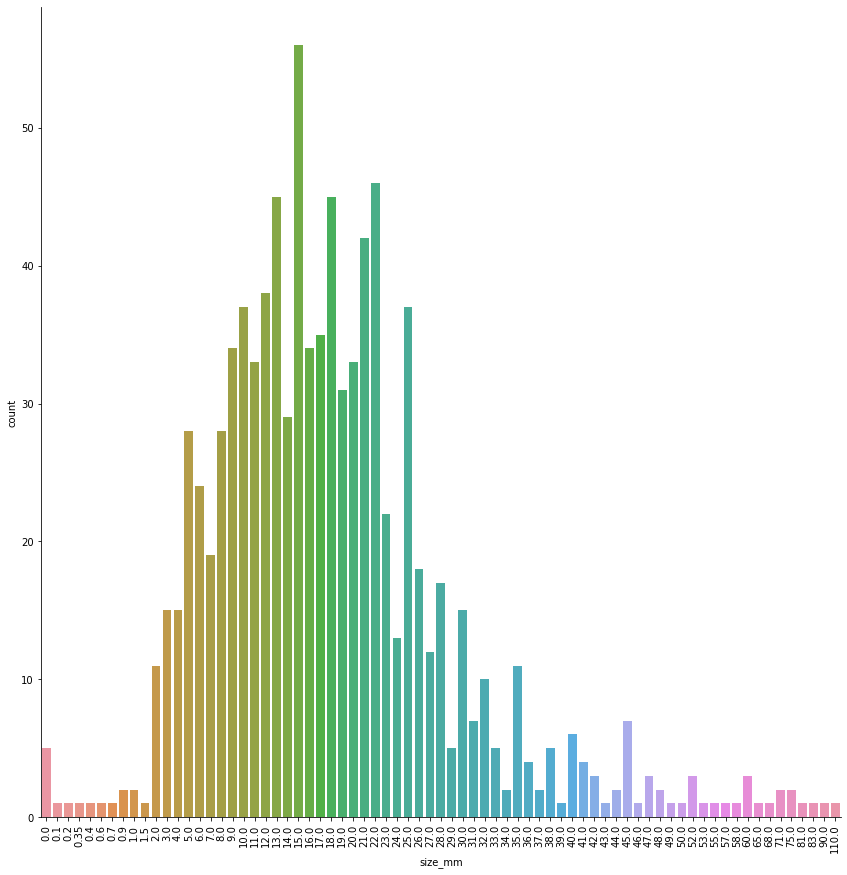

In [14]:
# 암의 장경 분포 


size_fig =sns.catplot(x ='size_mm',
            data=num_df, 
            kind='count',
            height =12
           )

size_fig.set_xticklabels(rotation=90)

plt.show()

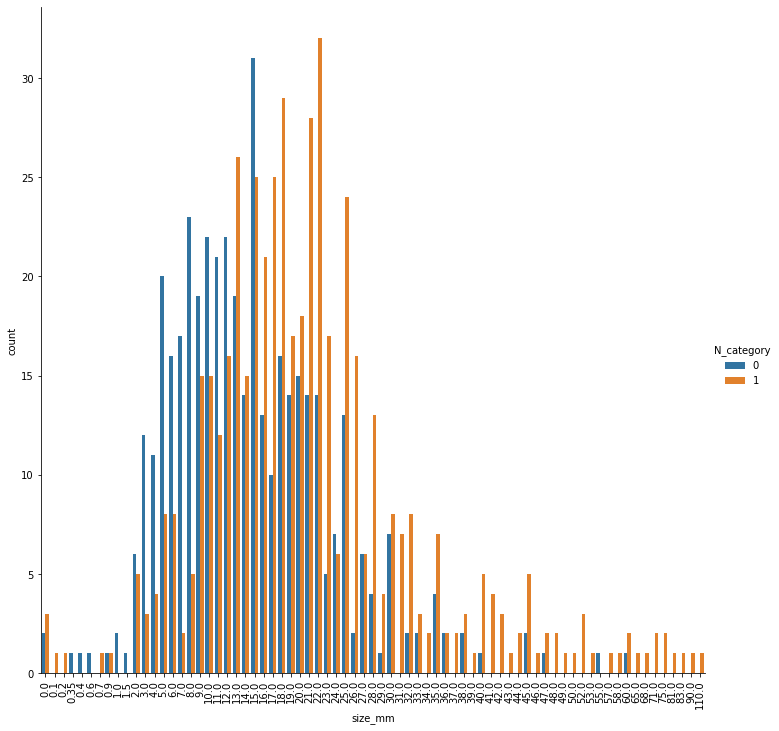

In [15]:
# 장경 크기 VS 전이 여부

size_corr = sns.catplot( x="size_mm",
                       data=num_df,
                       hue = 'N_category',
                       kind='count',
                       height =10)

size_corr.set_xticklabels(rotation=90)

plt.show()

#### 관찰 1
> 전이된 암의 size의 평균이 전이되지 않은 암보다 다소 높음 

> 결측값 : 전이 안된 케이스가 더 많음, 0 으로 채우기? 

### 'ER_Allred_score'

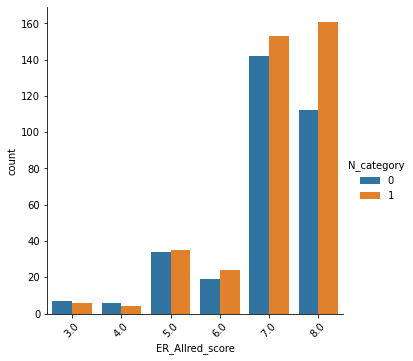

In [16]:
#ER_Allred_score : 에스트로겐 수용체 관련 
shape_fig =sns.catplot(x ='ER_Allred_score',
            data=train_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### 'PR_Allred_score'

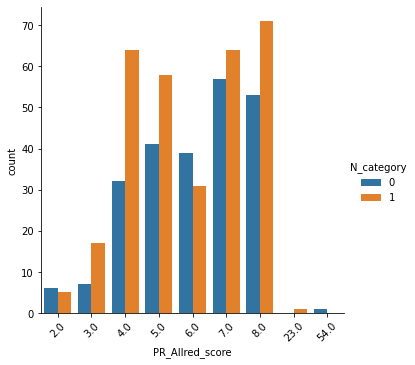

In [17]:
#PR_Allred_score : 프로게스테론 수용체 관련 
shape_fig =sns.catplot(x ='PR_Allred_score',
            data=num_df, 
            kind='count',
           # height =8,
           hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

In [18]:
train_df[train_df.PR_Allred_score > 9]

,ID,img_path,mask_path,age,yr_mn_dt,diag_cat,location,sng_mul,size_mm,NG,HG,HG_score_1,HG_score_2,HG_score_3,DCIS_or_LCIS,DCIS_or_LCIS_type,T_category,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
66,BC_01_0308,./train_imgs/BC_01_0308.png,-,62,2020-03-10,1,1,1,15.0,2.0,2.0,3.0,2.0,2.0,2,2.0,1.0,1.0,7.0,1.0,23.0,24.99,0.0,2.0,0.0,1.31,0.0,1
67,BC_01_0309,./train_imgs/BC_01_0309.png,-,77,2020-03-02,1,2,1,33.0,3.0,3.0,3.0,3.0,3.0,2,2.0,2.0,1.0,6.0,1.0,54.0,45.27,1.0,3.0,NaN,NaN,NaN,0


#### 전처리 항목
> 22, 54는 outlier 

### KI-67_LI_percent

In [19]:
num_df['KI-67_LI_percent']

0      12.0
1      70.0
2       7.0
3       1.0
4       8.0
       ... 
995     NaN
996     NaN
997     NaN
998     NaN
999     NaN
Name: KI-67_LI_percent, Length: 1000, dtype: float64

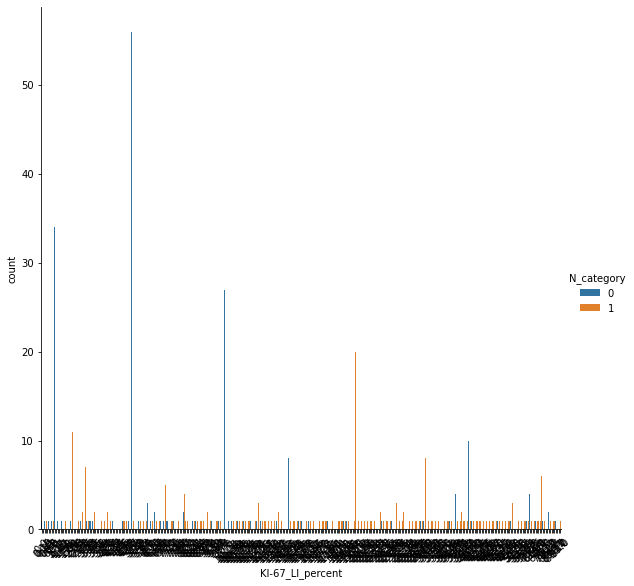

In [20]:
#KI-67_LI_percent : positively stained tumor cells , 악성 종양의 총 개수 중에서. 
shape_fig =sns.catplot(x ='KI-67_LI_percent',
            data=num_df, 
            kind='count',
           height =8,
           hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

#### 치현님 EDA 참고
> 0 으로 채우기?

### HER2_SISH_ratio

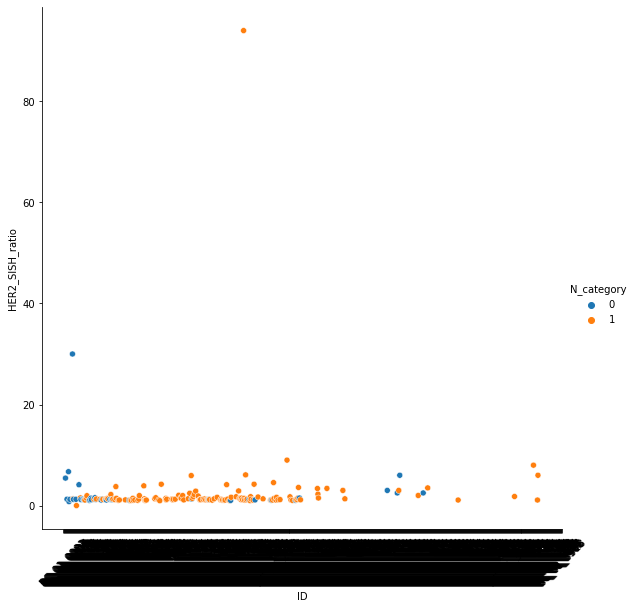

In [47]:
# 상관관계 찾기 
shape_fig =sns.relplot(x='ID',
                       y='HER2_SISH_ratio',
            data=train_df, 
            kind='scatter',
           height = 8 ,
           hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

관련 있는 컬럼 찾아보고 아니면 버리기? 

## Categorical 

In [49]:
cat_df = train_df[cat_cols]

cat_df.head()

,diag_cat,location,sng_mul,NG,HG,HG_score_1,HG_score_2,HG_score_3,DCIS_or_LCIS,DCIS_or_LCIS_type,T_category,ER,PR,HER2,HER2_IHC,HER2_SISH,BRCA_mutation,N_category
0,1,2,1,2.0,1.0,2.0,2.0,1.0,2,NaN,1.0,1.0,1.0,0.0,1.0,NaN,NaN,0
1,1,1,1,3.0,3.0,3.0,3.0,3.0,0,NaN,2.0,0.0,0.0,0.0,0.0,NaN,NaN,1
2,1,2,1,2.0,NaN,NaN,NaN,NaN,1,2.0,0.0,1.0,1.0,0.0,1.0,NaN,0.0,0
3,1,2,1,3.0,3.0,3.0,3.0,2.0,1,2.0,0.0,0.0,0.0,1.0,3.0,NaN,NaN,0
4,1,2,1,2.0,2.0,3.0,2.0,1.0,2,NaN,1.0,1.0,0.0,1.0,2.0,1.0,NaN,0


<AxesSubplot:>

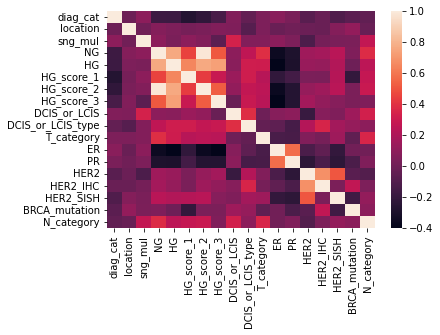

In [81]:
sns.heatmap(cat_df.corr())

### Diag_cat

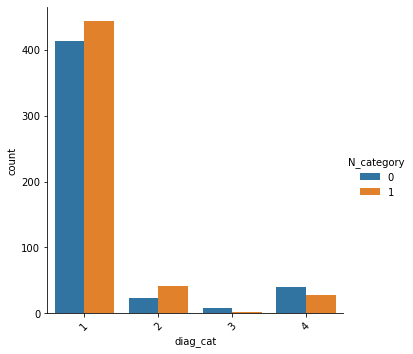

In [67]:
# 진단명

shape_fig =sns.catplot(x ='diag_cat',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### location

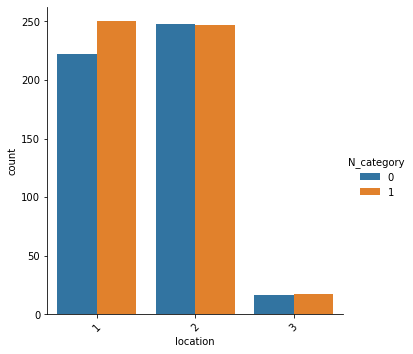

In [69]:
# 진단명

shape_fig =sns.catplot(x ='location',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

#### 전처리 항목

삭제?

### 암의 개수 

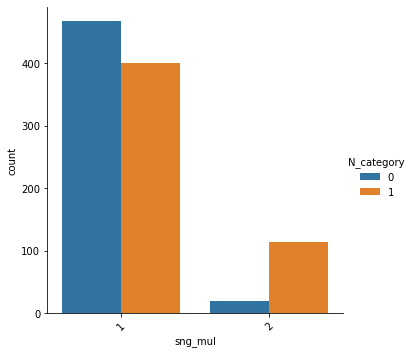

In [70]:
# 진단명

shape_fig =sns.catplot(x ='sng_mul',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

In [ ]:
### 핵

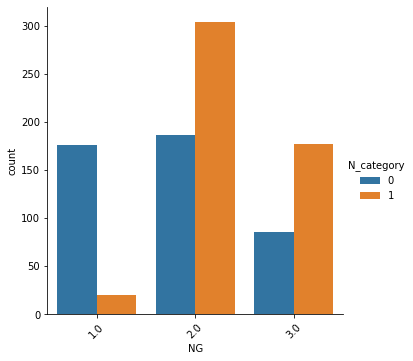

In [68]:
# 핵의 모양

shape_fig =sns.catplot(x ='NG',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

#### 관찰 2
> 핵의 모양이 정상에 가까운 경우 전이 확률 낮음

### HG

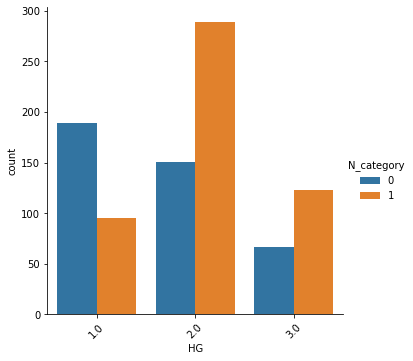

In [77]:
# HG 가 몬데.. 

shape_fig =sns.catplot(x ='HG',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### HG_score_1

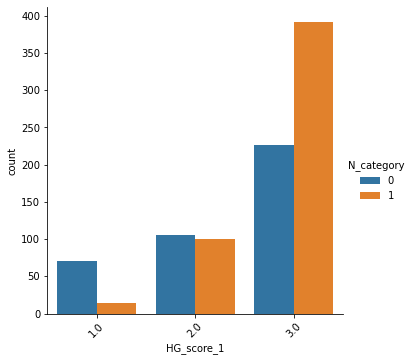

In [75]:
# Tubule formation - 세관 

shape_fig =sns.catplot(x ='HG_score_1',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### HG_score_2

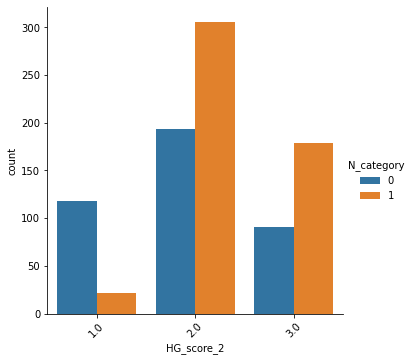

In [73]:
# 진단명

shape_fig =sns.catplot(x ='HG_score_2',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### HG_score_3 

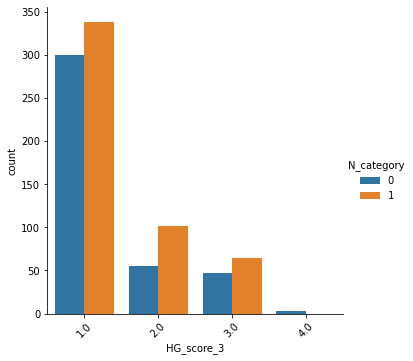

In [72]:
# 진단명

shape_fig =sns.catplot(x ='HG_score_3',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### DCIS_or_LCIS

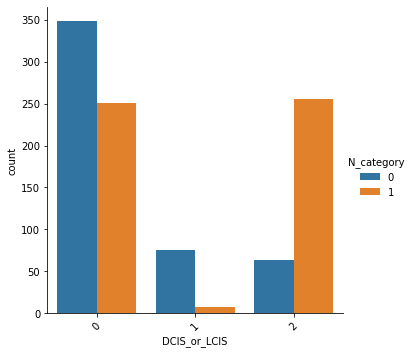

In [50]:
# 진단명

shape_fig =sns.catplot(x ='DCIS_or_LCIS',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### DCIS_or_LCIS_type

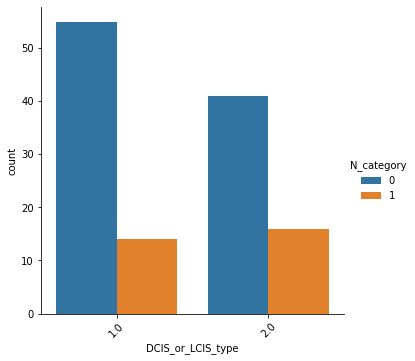

In [51]:
# 진단명

shape_fig =sns.catplot(x ='DCIS_or_LCIS_type',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

In [ ]:
> 삭제? 

### T_category

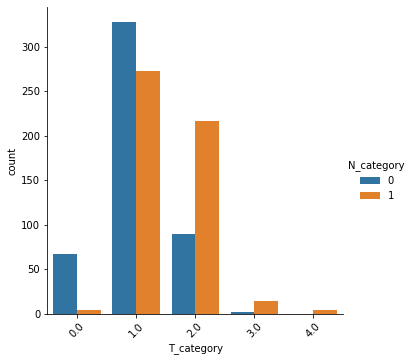

In [52]:
# 크기별 분류? 굳이 왜 한 번 더 한지는 모르겠음 

shape_fig =sns.catplot(x ='T_category',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### ER

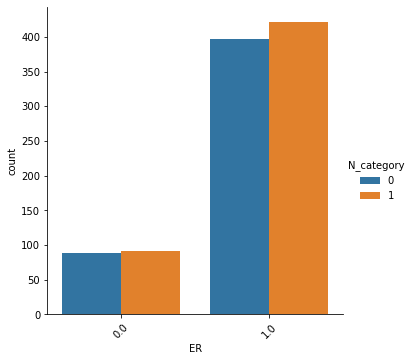

In [53]:
# 크기별 분류? 굳이 왜 한 번 더 한지는 모르겠음 

shape_fig =sns.catplot(x ='ER',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### PR

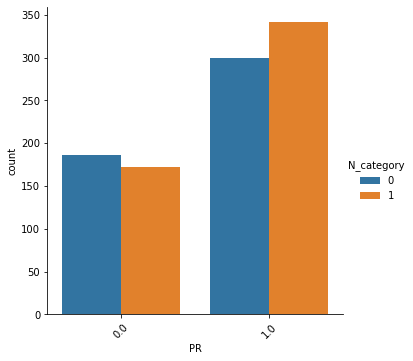

In [54]:
# 

shape_fig =sns.catplot(x ='PR',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### HER2

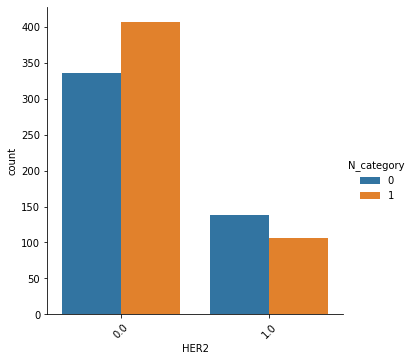

In [55]:
# 크기별 분류? 굳이 왜 한 번 더 한지는 모르겠음 

shape_fig =sns.catplot(x ='HER2',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### HER2_IHC

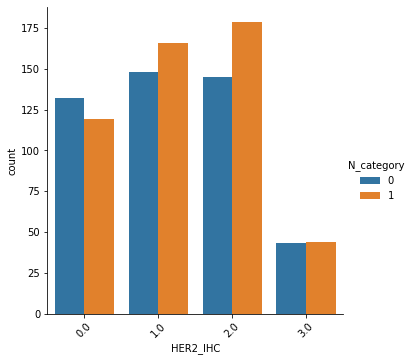

In [56]:
# 

shape_fig =sns.catplot(x ='HER2_IHC',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### HER2_SISH

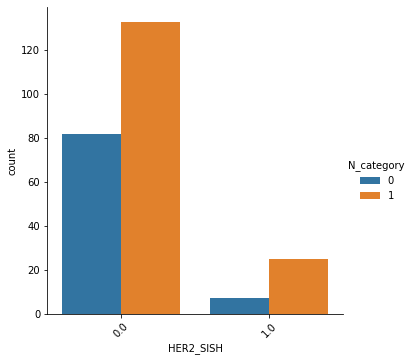

In [57]:
# 

shape_fig =sns.catplot(x ='HER2_SISH',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

### BRCA_mutation

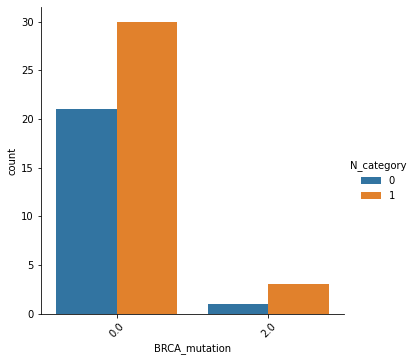

In [58]:
# 

shape_fig =sns.catplot(x ='BRCA_mutation',
            data=cat_df, 
            kind='count',
           # height =8,
            hue = 'N_category'
           )

shape_fig.set_xticklabels(rotation=45)

plt.show()

In [ ]:
'HER2_SISH','BRCA_mutation','N_category']